# LeNet5

LeNet 诞生于 1994 年，是最早的卷积神经网络之一，并且推动了深度学习领域的发展。自从 1988 年开始，在多次迭代后这个开拓性成果被命名为 LeNet5。LeNet5 的架构的提出是基于如下的观点：图像的特征分布在整张图像上，通过带有可学习参数的卷积，从而有效的减少了参数数量，能够在多个位置上提取相似特征。

在LeNet5提出的时候，没有 GPU 帮助训练，甚至 CPU 的速度也很慢，因此，LeNet5的规模并不大。其包含七个处理层，每一层都包含可训练参数（权重），当时使用的输入数据是 $32 \times 32$ 像素的图像。LeNet-5 这个网络虽然很小，但是它包含了深度学习的基本模块：卷积层，池化层，全连接层。它是其他深度学习模型的基础，这里对LeNet5进行深入分析和讲解，通过实例分析，加深对与卷积层和池化层的理解。

定义网络为：

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # 1-input channel, 6-output channels, 5x5-conv
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 6-input channel, 16-output channels, 5x5-conv
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 16x5x5-input, 120-output
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        # 120-input, 84-output
        self.fc2 = nn.Linear(120, 84)
        # 84-input, 10-output
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = torch.flatten(x, 1) # 将结果拉升成1维向量，除了批次的维度
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [2]:
net = LeNet5()
print(net)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [3]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0124,  0.1326,  0.1647,  0.0728,  0.0722,  0.0113,  0.0829, -0.0055,
          0.1749, -0.0581]], grad_fn=<AddmmBackward>)


In [4]:
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
from torchvision import transforms as tfs
from utils import train

# 使用数据增强
def data_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(32),
        tfs.ToTensor() #,
        #tfs.Normalize([0.5], [0.5])
    ])
    x = im_aug(x)
    return x
     
train_set  = mnist.MNIST('../../data/mnist', train=True,  transform=data_tf, download=True) 
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set   = mnist.MNIST('../../data/mnist', train=False, transform=data_tf, download=True) 
test_data  = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

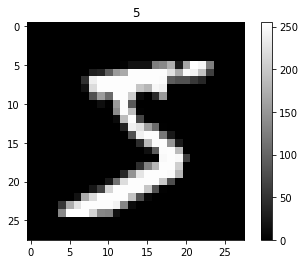

In [5]:
# 显示其中一个数据
import matplotlib.pyplot as plt
plt.imshow(train_set.data[0], cmap='gray')
plt.title('%i' % train_set.targets[0])
plt.colorbar()
plt.show()

torch.Size([64, 1, 32, 32])
torch.Size([64])


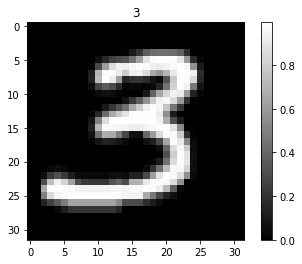

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [6]:
import matplotlib.pyplot as plt

# 显示转化后的图像
for im, label in train_data:
    print(im.shape)
    print(label.shape)
    
    img = im[0,0,:,:]
    lab = label[0]
    plt.imshow(img, cmap='gray')
    plt.title('%i' % lab)
    plt.colorbar()
    plt.show()

    print(im[0,0,:,:])
    break

In [7]:
net = LeNet5()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

res = train(net, train_data, test_data, 20, optimizer, criterion)

Epoch 0. Train Loss: 0.292838, Train Acc: 0.908382, Valid Loss: 0.075638, Valid Acc: 0.974684, Time 00:00:13
Epoch 1. Train Loss: 0.077091, Train Acc: 0.976479, Valid Loss: 0.066128, Valid Acc: 0.978936, Time 00:00:14
Epoch 2. Train Loss: 0.055866, Train Acc: 0.982759, Valid Loss: 0.042326, Valid Acc: 0.986748, Time 00:00:14
Epoch 3. Train Loss: 0.043993, Train Acc: 0.986257, Valid Loss: 0.042040, Valid Acc: 0.986847, Time 00:00:14
Epoch 4. Train Loss: 0.035289, Train Acc: 0.988823, Valid Loss: 0.035118, Valid Acc: 0.988430, Time 00:00:14
Epoch 5. Train Loss: 0.030174, Train Acc: 0.990572, Valid Loss: 0.036890, Valid Acc: 0.988430, Time 00:00:14
Epoch 6. Train Loss: 0.025604, Train Acc: 0.991571, Valid Loss: 0.028075, Valid Acc: 0.990803, Time 00:00:14
Epoch 7. Train Loss: 0.021483, Train Acc: 0.993220, Valid Loss: 0.039955, Valid Acc: 0.988133, Time 00:00:14
Epoch 8. Train Loss: 0.018553, Train Acc: 0.994020, Valid Loss: 0.031569, Valid Acc: 0.990506, Time 00:00:14
Epoch 9. Train Loss

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(res[0], label='train')
plt.plot(res[2], label='valid')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('fig-res-lenet5-train-validate-loss.pdf')
plt.show()

plt.plot(res[1], label='train')
plt.plot(res[3], label='valid')
plt.xlabel('epoch')
plt.ylabel('Acc')
plt.legend(loc='best')
plt.savefig('fig-res-lenet5-train-validate-acc.pdf')
plt.show()